In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Loading data

In [9]:
raw_df = pd.read_csv("./data/hotel_bookings_clean.csv", low_memory=False)
df = raw_df.copy()

### Explore data

In [12]:
df.shape

(56501, 32)

In [16]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##### Create a new column for total nights

In [23]:
df['total_nights']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [24]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


### Univariate Analisys
##### The following attributes are selected as relevenat for univariate analisys

##### Categorical variables

In [25]:
#relative frecuency of is_canceled
df['is_canceled'].value_counts(dropna=False, normalize=True)

is_canceled
0    0.586007
1    0.413993
Name: proportion, dtype: float64

In [33]:
df['market_segment'].value_counts(dropna=False, normalize=True)

market_segment
Online TA        0.439798
Offline TA/TO    0.212279
Groups           0.177784
Direct           0.123927
Corporate        0.041557
Complementary    0.004283
Aviation         0.000372
Name: proportion, dtype: float64

In [38]:
#relative frecuency of Hotel
df['hotel'].value_counts(dropna=False, normalize=True)

hotel
Resort Hotel    0.677386
City Hotel      0.322614
Name: proportion, dtype: float64

##### Numeric variables

In [31]:
#statistics of lead_time
df['lead_time'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    56501.000000
mean       100.544610
std        101.160815
min          0.000000
5%           0.000000
25%         17.000000
50%         69.000000
75%        158.000000
95%        309.000000
max        737.000000
Name: lead_time, dtype: float64

[]

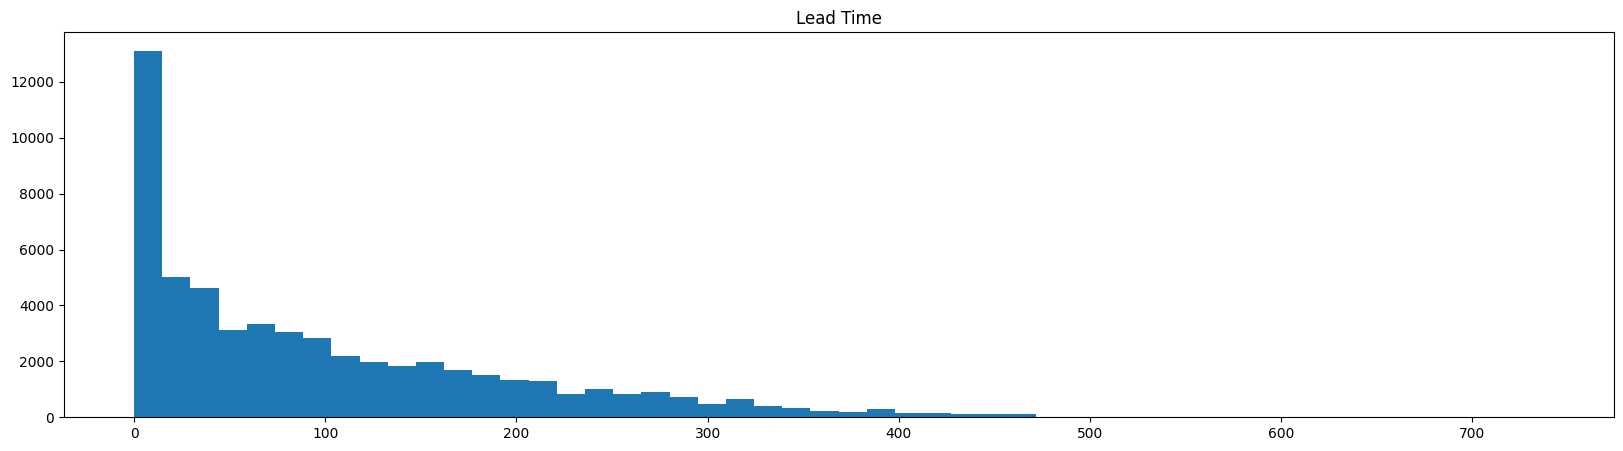

In [32]:
# Histogram for lead_time
plt.figure(figsize=(20, 5))
plt.hist(df["lead_time"], bins=50)
plt.title("Lead Time")
plt.plot()

In [41]:
#statistics of adr
df['adr'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    56501.000000
mean        96.484815
std         54.296987
min          0.000000
5%          34.510000
25%         60.000000
50%         84.710000
75%        120.270000
95%        207.900000
max        508.000000
Name: adr, dtype: float64

[]

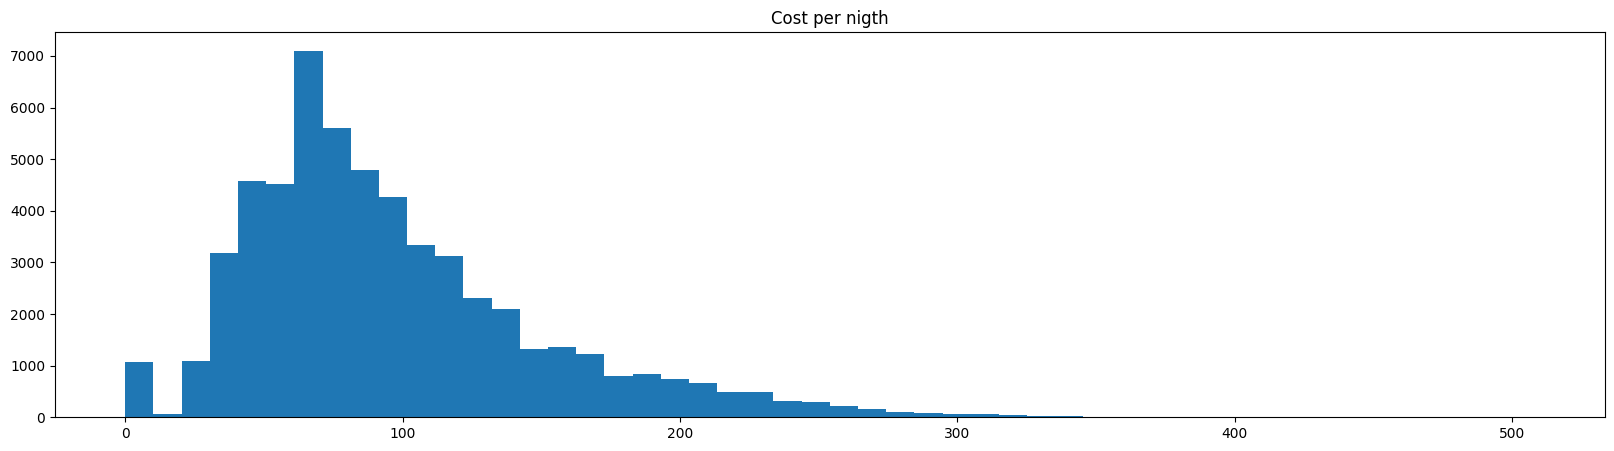

In [42]:
# Histogram for adr
plt.figure(figsize=(20, 5))
plt.hist(df["adr"], bins=50)
plt.title("Cost per nigth")
plt.plot()